# __IBM Employee Attrition Study__

This notebook follows an exploration of the attrition of IBM Employees. Given a dataset of of employee information, can we make strong predictions wether they will stay at the company or not?

## __Defining our Objectives__

While our data exploration will be largely open-ended, we should have some overall goals in mind as we tread into uncharted territory:

- [ ] Get a high-level understanding of our dataset and its features
- [ ] Conduct a multivariate analysis to look for patterns and corellations in the data
- [ ] Make educated guesses on how the features affect an employee's attrition status

## 0. Imports and Configurations

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data/"))

# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-HR-Employee-Attrition.csv']


## 1. Loading the Dataset and High-Level Overview

Our first steps are to load in our csv file as a ```pandas``` DataFrame and to take a quick look at the entire dataset. We want to understand the features we will be working with as well as see how they are represented.

In [3]:
DATA_PATH = "data/WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [4]:
df = pd.read_csv(DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### __Analysis__

We have 1,470 entries in our dataset and 35 columns/features, including that of _Attrition_. 

Of the 35 features, most are __quantitative__ represented by the ```int64``` data type. The rest are __categorical__, but we can make some useful abstractions for most of them:

Features such as _Arttrition_, _Gender_, _Marital Status_, _Over18_, and _OverTime_ represent __binary categorical__ data. These are easy to represent numerically as 1 or 0.

_Business Travel_ is an object but also is __ordinal__, meaning it represents an ordered structure of data. We can make this inference because it represents 3 values of increasing amount in travel: _Non Travel_, _Travel Rarely_, and _Travel Frequently_.

__Thoughts So Far__

We are fortunate to work with a rather clean and straight-forward dataset. Some basic visualization techniques should help point out if we have any need for data cleaning

## 2. Preliminary Visualization and data cleaning

__Is this a balanced dataset?__

One of the first things that will be useful to understand right away is wether we have a balaned dataset. Essentially, we are checking if we gathered roughly equal data for both employees who have left the company and for those who have stayed. Lets take a quick look:

No     1233
Yes     237
Name: Attrition, dtype: int64


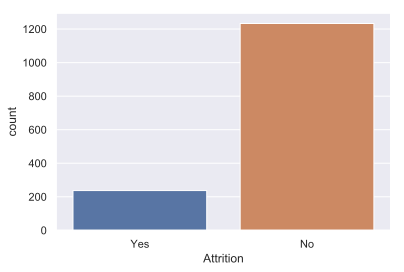

In [6]:
print(df['Attrition'].value_counts())
sns.countplot(df['Attrition']);

__So no. Our dataset is inbalanced.__ Why do we care about this?

1. Building machine learning predictions will be more difficult, as answers will be more biased towards 'no'.
2. Our own inferences need to be carefully considered when looking for patterns in 'Yes' results for Attrition. We cannot mix up _causation_ for _correlation_

### Filtering Categorical and Numerical Features

* We'll want to apply the right kind of visualizations depending on the type of feature, so its a good idea to create filters for them when accessing the dataframe:

In [7]:
# Filter Data
numerical, categorical = [], []

for col in df.columns:
    if df[col].dtype == 'O':
        categorical.append(col)
    else:
        numerical.append(col)

### __Heatmap Matrix__

A good starting point for our quantitaive data will be to create a heatmap that will look for correlations in our data. As stated above, we need to becareful in mixing up _causation_ with _correlation_, but it could provide some leads for further exploration

We have a lot of numerical columns to create correlations for, so its hard to visualize all of them in one grid. Instead, we can look at the majority first and see if there is anything peculiar about the data:

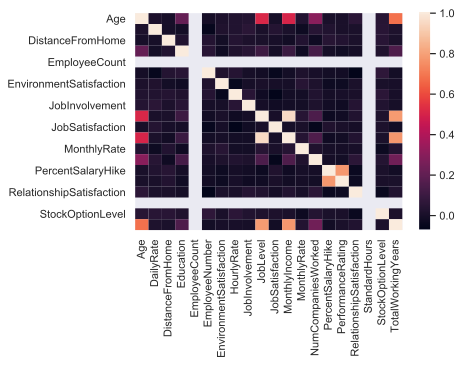

In [8]:
# Creating a correlation matrix
corr_matrix = df[numerical[:20]].corr()
# Plotting heatmap
sns.heatmap(corr_matrix);

The _EmployeeCount_ and _StandardHours_ columns seem interesting. It looks like they have a standard value used for all employee records available.

Let's take a closer look into these two columns:

In [9]:
print(df['EmployeeCount'].value_counts())
print(df['StandardHours'].value_counts())

1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64


Our inference was correct! Both columns have a single value across all employee entrees. Since these features are not providing us any further insight on attrition, we will drop them.

__*Note on dropping features*__: If